# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [3]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
browser = Browser('chrome')

In [5]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [6]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [7]:
# Extract all rows of data
all_rows = soup.find_all('tr', class_="data-row")

In [8]:
# Create an empty list
site_data = []

# Loop through the scraped data to create a list of rows
for row in all_rows:
    data = row.find_all('td')
    
    # List comprehension to collect text only from each column in the row
    row = [col.text for col in data]
    
    # Append to the list
    site_data.append(row)


In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_data = pd.DataFrame(site_data, columns = ['id','terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [10]:
# Confirm DataFrame was created successfully
mars_data.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [11]:
# Examine data type of each column
mars_data.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis

mars_data['terrestrial_date'] = pd.to_datetime(mars_data['terrestrial_date'], yearfirst=True)
mars_data['sol'] = mars_data['sol'].astype(int)
mars_data['month'] = mars_data['month'].astype(int)
mars_data['min_temp'] = mars_data['min_temp'].astype(float)
mars_data['pressure'] = mars_data['pressure'].astype(float)


In [13]:
# Confirm type changes were successful by examining data types again
mars_data.dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                          object
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [14]:
# 1. How many months are there on Mars?
mars_data['month'].nunique()


12

In [28]:
# 2. How many Martian days' worth of data are there?
martian_year = mars_data['sol'].count()


In [29]:
# 3. What is the average low temperature by month?
mars_avg_low = mars_data.groupby('month')['min_temp'].mean()
mars_avg_low


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

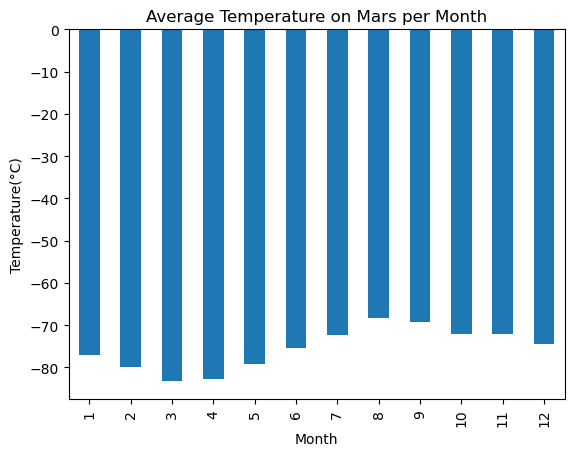

In [30]:
# Plot the average temperature by month
mars_avg_low.plot(kind="bar", title="Average Temperature on Mars per Month")

plt.ylabel("Temperature(°C)")
plt.xlabel("Month")


plt.show()

In [31]:
# Identify the coldest and hottest months in Curiosity's location
# Use .idmax() and .idmin() to identify which Martian month contained to highest and lowest averages.

print(f'Coldest month: {mars_avg_low.idxmin()}. Average temperature (°C): {round(mars_avg_low.min(),2)}')
print(f'Hottest month: {mars_avg_low.idxmax()}. Average temperature (°C): {round(mars_avg_low.max(),2)}')


Coldest month: 3. Average temperature (°C): -83.31
Hottest month: 8. Average temperature (°C): -68.38


In [32]:
# 4. Average pressure by Martian month
mars_avg_pressure = mars_data.groupby('month')['pressure'].mean()
mars_avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

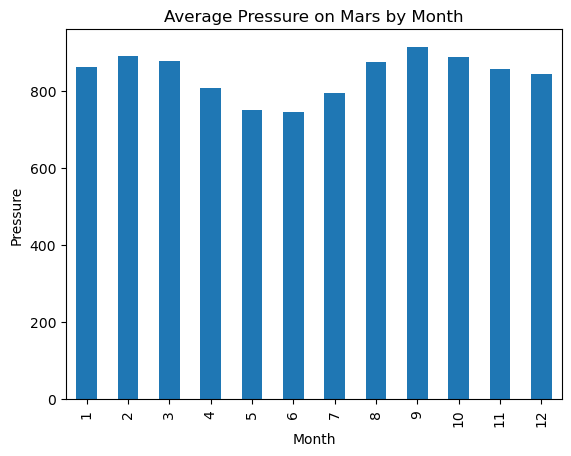

In [33]:
# Plot the average pressure by month
mars_avg_pressure.plot(kind="bar", title="Average Pressure on Mars by Month")

plt.ylabel("Pressure")
plt.xlabel("Month")

plt.show()

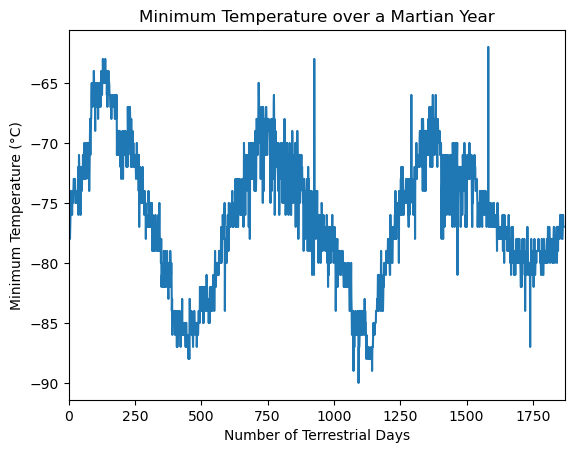

In [40]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_data["min_temp"].plot(kind="line", title="Minimum Temperature over a Martian Year", xlim=[0, 1870])
plt.ylabel("Minimum Temperature (°C)")
plt.xlabel("Number of Terrestrial Days")
plt.show()


## Quick analysis

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

# Remove when complete

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [41]:
# Write the data to a CSV
mars_data.to_csv('mars_data.csv', encoding='utf-8')

In [42]:
browser.quit()